# Detecting chessboard and circle grid patterns

In this recipe, you will learn how to detect chessboard and circle grid patterns. These patterns are very useful in computer vision, and are often used for estimating camera parameters.

Calibration pattern detection is implemented with two OpenCV functions: `cv2.findChessboardCorners` and `cv2.findCirclesGrid`. Both functions return Boolean flags indicating whether the pattern is found or not, and the corner points, if found. 

In [1]:
# Import the module
import time
import imutils

# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


# [Camera Calibration](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html)



------  image_chess--------------    Shape(240, 320, 3) image_chess: uint8
[ [188 188 188] [186 186 186] [187 187 187] [187 187 187] [186 186 186] [186 186 186] [187 187 187] ]
[ [188 188 188] [188 188 188] [188 188 188] [188 188 188] [188 188 188] [189 189 189] [189 189 189] ]
[ [190 190 190] [190 190 190] [190 190 190] [190 190 190] [190 190 190] [190 190 190] [190 190 190] ]
[ [190 190 190] [190 190 190] [190 190 190] [190 190 190] [190 190 190] [190 190 190] [191 191 191] ]


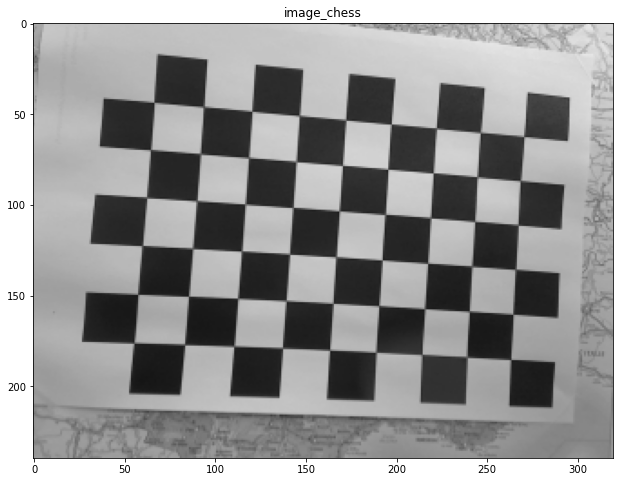

In [2]:
# Load the test image with a chessboard
image_chess = cv2.imread('../data/chessboard.png')


############################################################
print_image('image_chess','image_chess',image_chess,50,54,70,77)
plt_view_image(plt,[["image_chess",image_chess[:,:,[2,1,0]] ]], figsize=(15,8), axis='on', cmap='gray')

cv2.imshow('image_chess', image_chess)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# Finds the positions of internal corners of the chessboard.
#retval, corners = cv.findChessboardCorners(image, patternSize[, corners[, flags]])
#  image - Source chessboard view. It must be an 8-bit grayscale or color image.
#  patternSize - Number of inner corners per a chessboard row and column 
#                ( patternSize = cv::Size(points_per_row,points_per_colum) = cv::Size(columns,rows) ).
#  corners - Output array of detected corners.
#  flags - Various operation flags that can be zero or a combination of the following values:
#          CALIB_CB_ADAPTIVE_THRESH Use adaptive thresholding to convert the image to black and white, 
#                                   rather than a fixed threshold level (computed from the average image brightness).
#          CALIB_CB_NORMALIZE_IMAGE Normalize the image gamma with equalizeHist before applying fixed or adaptive thresholding.
#          CALIB_CB_FILTER_QUADS Use additional criteria (like contour area, perimeter, square-like shape) to filter out 
#                                false quads extracted at the contour retrieval stage.
#          CALIB_CB_FAST_CHECK Run a fast check on the image that looks for chessboard corners, and shortcut the call if none is found. 
#                              This can drastically speed up the call in the degenerate condition when no chessboard is observed.
#
# The function attempts to determine whether the input image is a view of the chessboard pattern and locate the internal 
# chessboard corners. The function returns a non-zero value if all of the corners are found and they are placed in a certain 
# order (row by row, left to right in every row). Otherwise, if the function fails to find all the corners or reorder them, 
# it returns 0. For example, a regular chessboard has 8 x 8 squares and 7 x 7 internal corners, that is, points where the black 
# squares touch each other. The detected coordinates are approximate, and to determine their positions more accurately, 
# the function calls cornerSubPix. You also may use the function cornerSubPix with different parameters if returned coordinates 
# are not accurate enough.

# Detect the chessboard pattern
patternWasFound, corners = cv2.findChessboardCorners(image_chess, (6, 9),None)
assert patternWasFound == True, "can't find chessboard pattern"

------  image_chess--------------    Shape(240, 320, 3) image_chess: uint8
[ [87 87 87] [103 103 103] [115 115 115] [131 131 131] [145 145 145] [157 157 157] [166 166 166] ]
[ [44 44 44] [43 43 43] [42 42 42] [38 38 38] [38 38 38] [37 37 37] [35 35 35] ]
[ [41 41 41] [42 42 42] [41 41 41] [42 42 42] [42 42 42] [42 42 42] [37 37 37] ]
[ [41 41 41] [41 41 41] [41 41 41] [42 42 42] [41 41 41] [41 41 41] [40 40 40] ]
------  dbg_image_chess----------    Shape(240, 320, 3) dbg_image_chess: uint8
[ [87 87 87] [ 95 105 115] [ 15 126 236] [ 69 129 190] [145 145 145] [108 148 188] [  0 128 255] ]
[ [44 44 44] [35 60 87] [  7 114 219] [30 58 86] [38 38 38] [37 37 37] [ 14  90 168] ]
[ [41 41 41] [38 48 58] [  6 116 226] [ 23  82 141] [42 42 42] [ 31  66 102] [  0 128 255] ]
[ [41 41 41] [39 45 49] [ 11 104 196] [ 14 100 184] [ 30  65 104] [  0 128 255] [ 16  91 166] ]
------  image_return_chess-------    Shape(240, 320, 3) image_return_chess: uint8
[ [87 87 87] [ 95 105 115] [ 15 126 236] [ 69 1

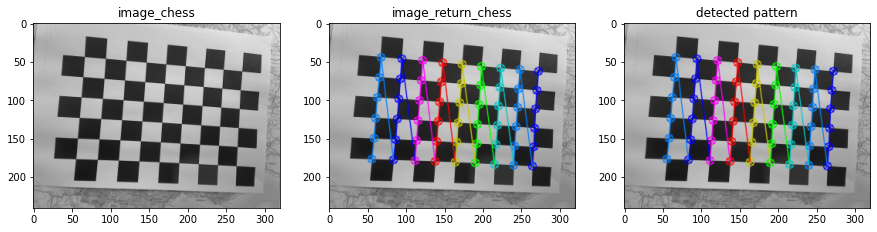

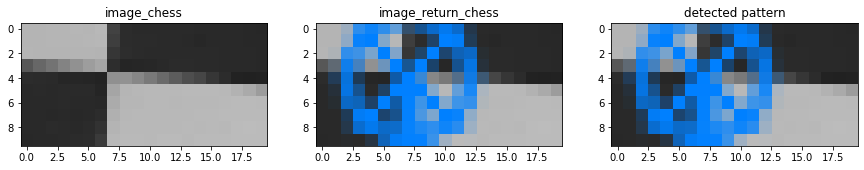

In [4]:
#image = cv.drawChessboardCorners(image, patternSize, corners, patternWasFound)
#  image - Destination image. It must be an 8-bit color image.
#  patternSize - Number of inner corners per a chessboard row and column 
#               (patternSize = cv::Size(points_per_row,points_per_column)).
#  corners - Array of detected corners, the output of findChessboardCorners.
#  patternWasFound - Parameter indicating whether the complete board was found or not. 
#                    The return value of findChessboardCorners should be passed here.

# Draw the detected pattern
dbg_image_chess = image_chess.copy()
image_return_chess = cv2.drawChessboardCorners(dbg_image_chess, (6, 9), corners, patternWasFound);


#############################################################
print_image('image_chess','image_chess',image_chess,43,47,60,67)
print_image('dbg_image_chess','dbg_image_chess',dbg_image_chess,43,47,60,67)
print_image('image_return_chess','image_return_chess',image_return_chess,43,47,60,67)


plt_view_image(plt,[["image_chess",image_chess[:,:,[2,1,0]] ],
                    ["image_return_chess",image_return_chess],
                    ["detected pattern",dbg_image_chess]  ],
              figsize=(15,8), axis='on', cmap='gray'
              )
plt_view_image(plt,[["image_chess",image_chess[40:50,60:80,[2,1,0]] ],
                    ["image_return_chess",image_return_chess[40:50,60:80]],
                    ["detected pattern",dbg_image_chess[40:50,60:80]  ]
                    ],
              figsize=(15,8), axis='on', cmap='gray'
              )

cv2.imshow('image_chess, image_return_chess, dbg_image_chess', 
           np.hstack([image_chess, image_return_chess, dbg_image_chess]))
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
# Load the test image with a circle grid pattern
image_circles = cv2.imread('../data/circlesgrid.png')


############################################
print_image('image_circles','image_circles',image_circles,0,1,0,7)
cv2.imshow('image_circles', image_circles)
cv2.waitKey()
cv2.destroyAllWindows()

------  image_circles------------    Shape(240, 320, 3) image_circles: uint8
[ [124 124 124] [144 144 144] [150 150 150] [149 149 149] [149 149 149] [150 150 150] [149 149 149] ]


------  image_circles------------    Shape(240, 320, 3) image_circles: uint8
[ [28 28 28] [29 29 29] [29 29 29] [29 29 29] [30 30 30] [30 30 30] [29 29 29] ]
[ [29 29 29] [29 29 29] [30 30 30] [29 29 29] [29 29 29] [29 29 29] [29 29 29] ]
[ [29 29 29] [29 29 29] [29 29 29] [29 29 29] [29 29 29] [30 30 30] [29 29 29] ]
[ [28 28 28] [28 28 28] [28 28 28] [28 28 28] [28 28 28] [29 29 29] [29 29 29] ]
[ [28 28 28] [28 28 28] [28 28 28] [29 29 29] [28 28 28] [29 29 29] [29 29 29] ]
[ [28 28 28] [28 28 28] [27 27 27] [28 28 28] [29 29 29] [29 29 29] [29 29 29] ]
[ [27 27 27] [28 28 28] [28 28 28] [30 30 30] [29 29 29] [30 30 30] [31 31 31] ]
[ [28 28 28] [28 28 28] [28 28 28] [28 28 28] [29 29 29] [31 31 31] [32 32 32] ]
[ [28 28 28] [29 29 29] [28 28 28] [28 28 28] [30 30 30] [32 32 32] [38 38 38] ]
[ [27 27 27] [28 28 28] [29 29 29] [30 30 30] [32 32 32] [39 39 39] [87 87 87] ]
[ [29 29 29] [29 29 29] [31 31 31] [33 33 33] [44 44 44] [92 92 92] [137 137 137] ]
[ [30 30 30] [32 32 32] [37 3

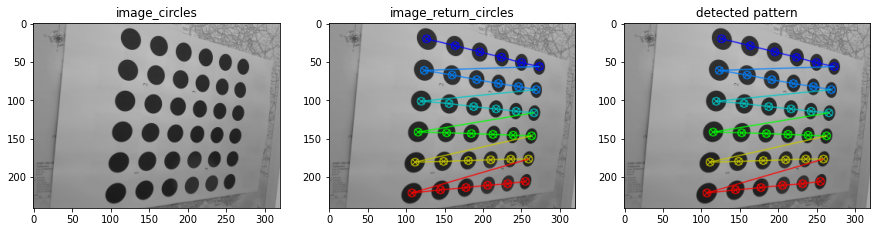

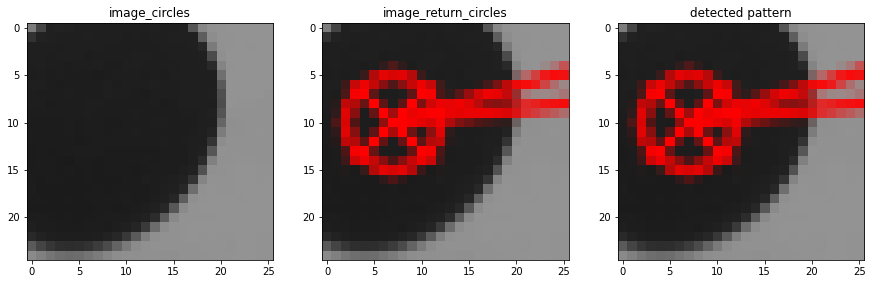

In [6]:
# Finds centers in the grid of circles.
#cv2.findCirclesGridDefault(image, patternSize[, centers[, flags]]) -> retval, centers
#  mage – grid view of input circles; it must be an 8-bit grayscale or color image.
#  patternSize – number of circles per row and column ( patternSize = Size(points_per_row, points_per_colum) ).
#  centers – output array of detected centers.
#  flags – various operation flags that can be one of the following values:
#          CALIB_CB_SYMMETRIC_GRID uses symmetric pattern of circles.
#          CALIB_CB_ASYMMETRIC_GRID uses asymmetric pattern of circles.
#          CALIB_CB_CLUSTERING uses a special algorithm for grid detection. It is more robust to perspective distortions 
#                              but much more sensitive to background clutter.
#          blobDetector – feature detector that finds blobs like dark circles on light background.
#
#   The function attempts to determine whether the input image contains a grid of circles. If it is, 
# the function locates centers of the circles. The function returns a non-zero value if all of the centers 
# have been found and they have been placed in a certain order (row by row, left to right in every row). 
# Otherwise, if the function fails to find all the corners or reorder them, it returns 0.

# Detect the circle grid pattern
patternWasFound, corners = cv2.findCirclesGrid(image_circles, (6, 6), cv2.CALIB_CB_SYMMETRIC_GRID)
assert patternWasFound == True, "can't find circles grid pattern"

# Draw the detected pattern
dbg_image_circles = image_circles.copy()
image_return_circles = cv2.drawChessboardCorners(dbg_image_circles, (6, 6), corners, patternWasFound);


#################################################################
print_image('image_circles','image_circles',image_circles,220,233,109,116)
print_image('dbg_image_circles','dbg_image_circles',dbg_image_circles,220,233,109,116)
print_image('image_return_circles','image_return_circles',image_return_circles,220,233,109,116)

plt_view_image(plt,[["image_circles",image_circles[:,:,[2,1,0]] ],
                    ["image_return_circles",image_return_circles],
                    ["detected pattern",dbg_image_circles]  ],
               figsize=(15,8), axis='on', cmap='gray'
              )
plt_view_image(plt,[["image_circles",image_circles[210:235,100:126,[2,1,0]] ],
                    ["image_return_circles",image_return_circles[210:235,100:126]],
                    ["detected pattern",dbg_image_circles[210:235,100:126]]  ],
               figsize=(15,8), axis='on', cmap='gray'
              )

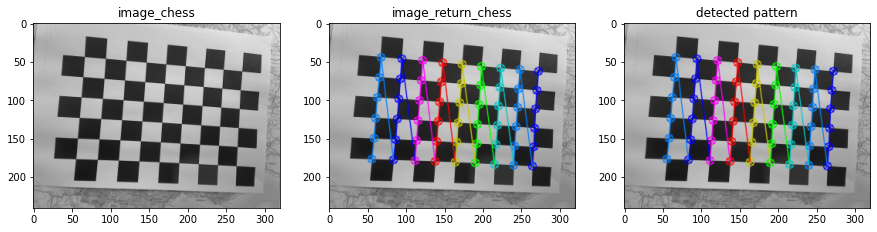

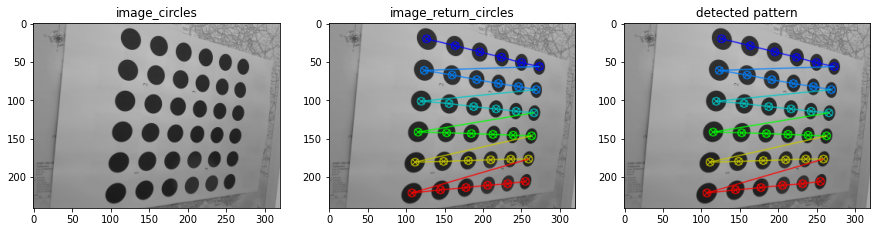

In [7]:
# Visualize the results
plt_view_image(plt,[["image_chess",image_chess[:,:,[2,1,0]]     ],
                    ["image_return_chess",image_return_chess],
                    ["detected pattern",dbg_image_chess]  ],
               figsize=(15,8), axis='on', cmap='gray'
              )
plt_view_image(plt,[["image_circles",image_circles[:,:,[2,1,0]] ],
                    ["image_return_circles",image_return_circles],
                    ["detected pattern",dbg_image_circles]  ],
               figsize=(15,8), axis='on', cmap='gray'
              )
cv2.imshow('image_circles, image_return_circles, dbg_image_circles', 
           np.hstack([image_circles, image_return_circles, dbg_image_circles]))
cv2.waitKey()
cv2.destroyAllWindows()